# Lab 5 (20-02-2024)

This lab experiments help you master how to do logistic regression.

We will be using Iris dataset and the customer info banking dataset.


In [1]:
Registration_Number = "22011103020"
Name = "Jayashre"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Jayashre and my roll no : 22011103020
Computer IP Address is: 172.28.0.12


## Churn detection
The dataset has
-   1 unique identifier
-   10 features (a mix of categorical and numerical)
-   1 label (0, 1)
The above is an classic example of binary classification problem

Expected:
1) Choose the features that matters most (use of covariance matrix)
2) Proper splitting of dataset into testing and training
3) Confusion matrix - Precision, recall, F1 score
4) Valuable data insight (some sort of visualization) using the label

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

og_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn Prediction.csv")

In [4]:
df = og_dataset.copy()

In [5]:
print(df)

print("--------------------------------")

print(df.describe())

print("--------------------------------")

print(df.info())

print("--------------------------------")

print(df.columns)




      customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0         

In [6]:
## Insight on Data - Choice of features

categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns= df.select_dtypes(exclude=['object']).columns

print(categorical_columns)

print("--------------------------------")

print(numerical_columns)


Index(['country', 'gender'], dtype='object')
--------------------------------
Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')


In [7]:
#Encoding

df = pd.get_dummies(df, columns=['country', 'gender'])

In [8]:
#selecting the features

#X = df.drop(['customer_id', 'churn'], axis=1)
X = df[['credit_score', 'balance']]
Y = df['churn']

In [9]:
#feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split dataset into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


In [11]:
## Logistic regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

In [12]:
## Evaluating the logistic regression model

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(conf_matrix, precision, recall, f1)

[[1607    0]
 [ 393    0]] 0.0 0.0 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


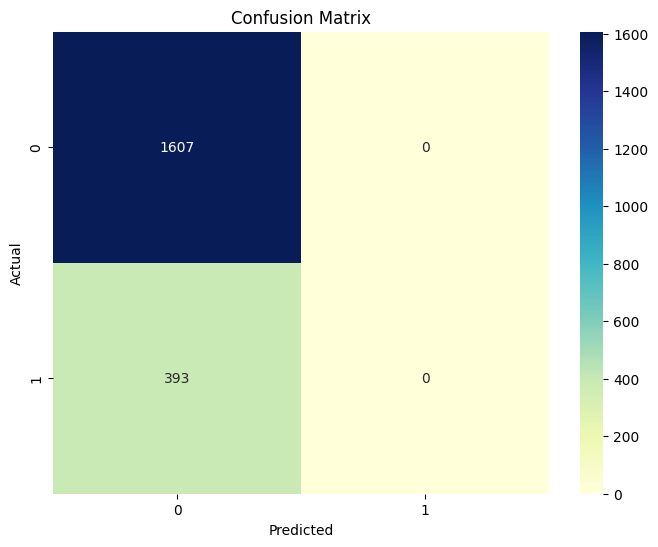

In [13]:
# confusion matrix visualization

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

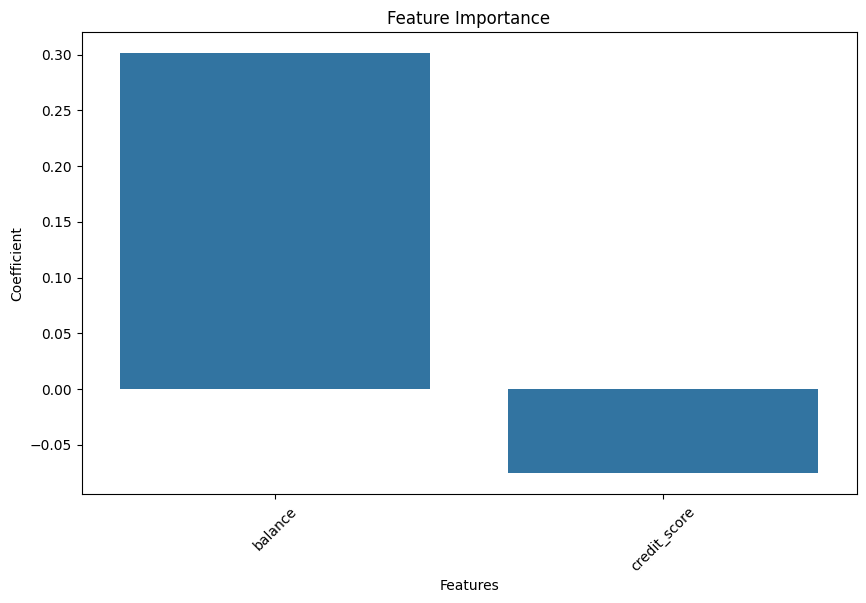

In [14]:
# visualization of feature importance

import numpy as np

coefficients = pd.DataFrame(model.coef_.reshape(-1, 1), columns=['Coefficient'], index=X.columns)
coefficients['Abs_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance')
plt.show()

## Iris Dataset - Multi-class classification

1) Use sci-kit learn inbuilt logistic regression
2) Convert the problem into three binary classification problem. Each sub-problem predicts whether it belongs to the class or not. Finally, compare the outputs of the three classifiers to decide which class it belongs.
3) Use confusion matrix on both cases, compare the performance of the two models.



In [15]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

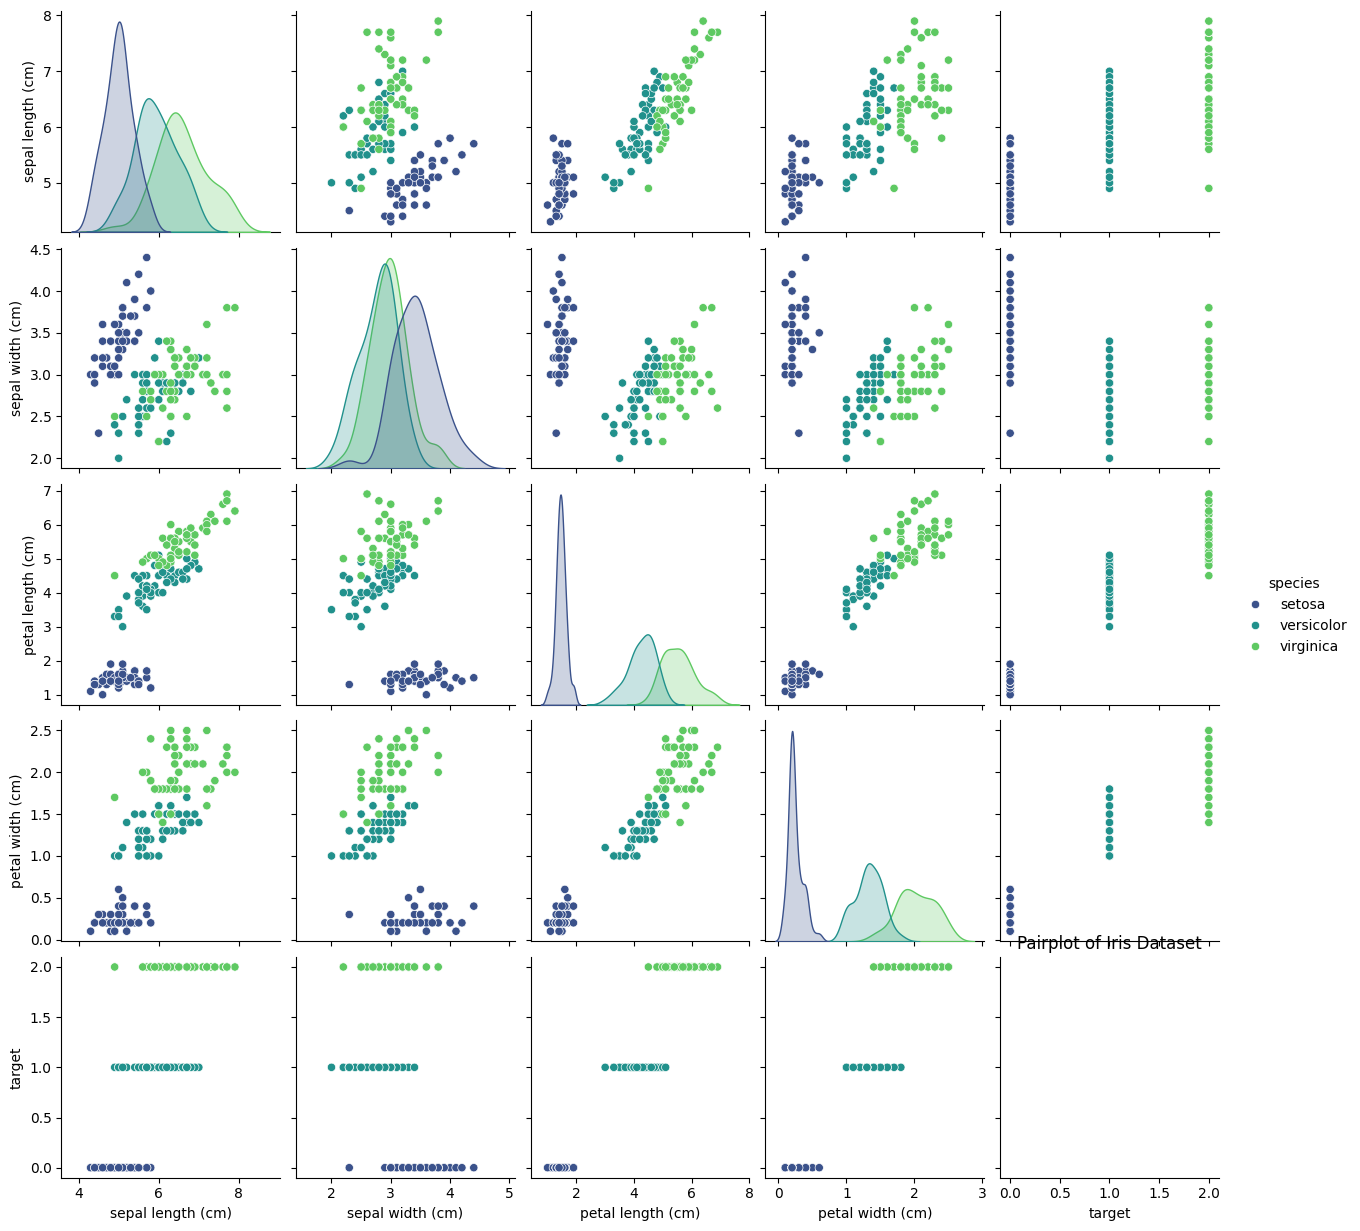

<ipython-input-20-ae44394ef423>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=iris_df, palette='viridis')
<ipython-input-20-ae44394ef423>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=iris_df, palette='viridis')
<ipython-input-20-ae44394ef423>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=iris_df, palette='viridis')
<ipython-input-20-ae44394ef423>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

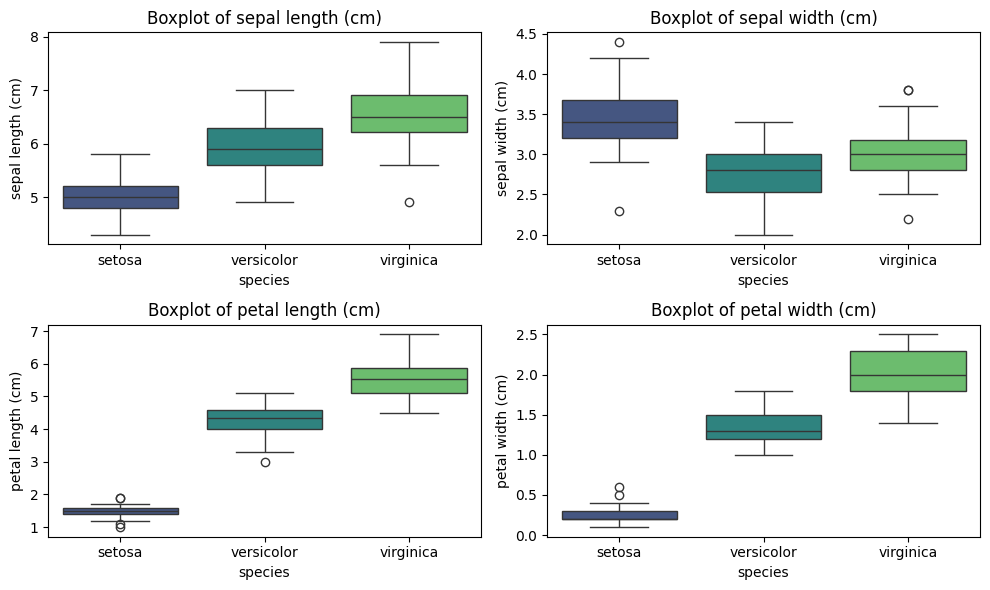

<ipython-input-20-ae44394ef423>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=feature, data=iris_df, palette='viridis')
<ipython-input-20-ae44394ef423>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=feature, data=iris_df, palette='viridis')
<ipython-input-20-ae44394ef423>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=feature, data=iris_df, palette='viridis')
<ipython-input-20-ae44394ef423>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

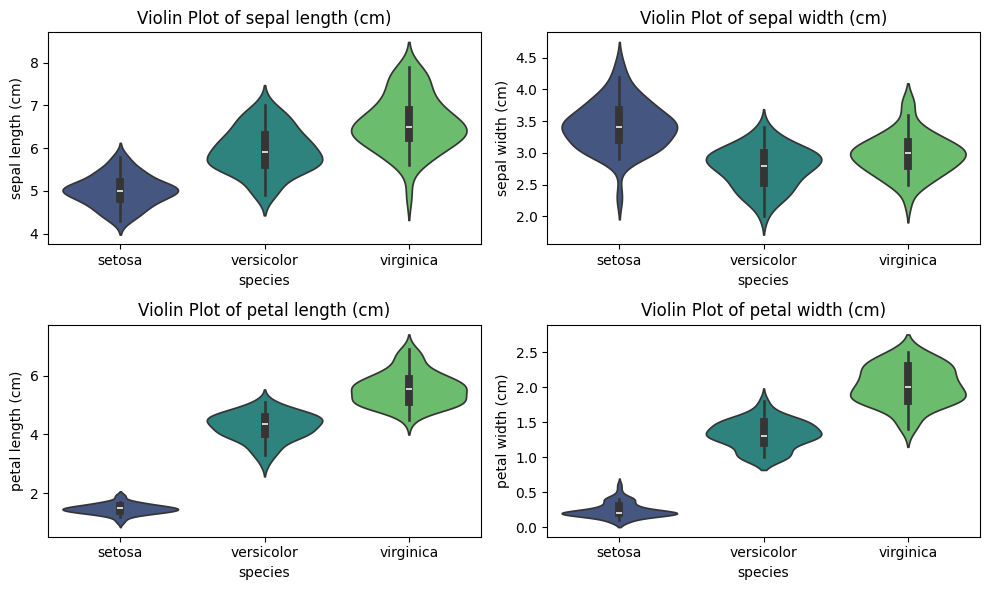

In [20]:
## Data set visualization

iris_df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
iris_df['target'] = iris_dataset.target
iris_df['species'] = iris_df['target'].map({0: iris_dataset.target_names[0], 1: iris_dataset.target_names[1], 2: iris_dataset.target_names[2]})

#pair plot
sns.pairplot(iris_df, hue='species', palette='viridis')
plt.title('Pairplot of Iris Dataset')
plt.show()

#box-plot
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris_dataset.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=iris_df, palette='viridis')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

#violin-plot
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris_dataset.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='species', y=feature, data=iris_df, palette='viridis')
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()


In [22]:
## Method 1: In-built logistic regression (multi-class classification)

X = iris_dataset.data
Y = iris_dataset.target

#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, Y_train)

Y_pred = lr_model.predict(X_test)

In [29]:
## Confusion matrix and scores

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score

conf_matrix = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)



print(conf_matrix)

print("------------------------------------------")

print(acc)

print("------------------------------------------")


print(classification_report(Y_test, Y_pred, target_names=iris_dataset.target_names))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
------------------------------------------
1.0
------------------------------------------
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [34]:
## Method 2 using in-built functions (Three binary classification problems)

for class_label in range(3):

    binary_Y_train = (Y_train == class_label).astype(int)
    binary_Y_test = (Y_test == class_label).astype(int)

    lr_model_binary = LogisticRegression(max_iter=1000)
    lr_model_binary.fit(X_train, binary_Y_train)

    Y_pred_binary = lr_model_binary.predict(X_test)


    conf_matrix_binary = confusion_matrix(binary_Y_test, Y_pred_binary)
    accu = accuracy_score(binary_Y_test, Y_pred_binary)
    print(f"\nBinary Classification for Class {class_label}:")
    print(conf_matrix_binary)
    print(accu)


Binary Classification for Class 0:
[[20  0]
 [ 0 10]]
1.0

Binary Classification for Class 1:
[[19  2]
 [ 4  5]]
0.8

Binary Classification for Class 2:
[[19  0]
 [ 0 11]]
1.0
